In [37]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import dateutil.parser
import matplotlib.dates as mdates
from enum import Enum

def load(path: str):
    fh = open(path)
    data = json.load(fh)
    fh.close()
    return data

data = load("/home/wqsz7xn/Projects/go-gopher/output/merged-log-SOFTENG206-2022.json")

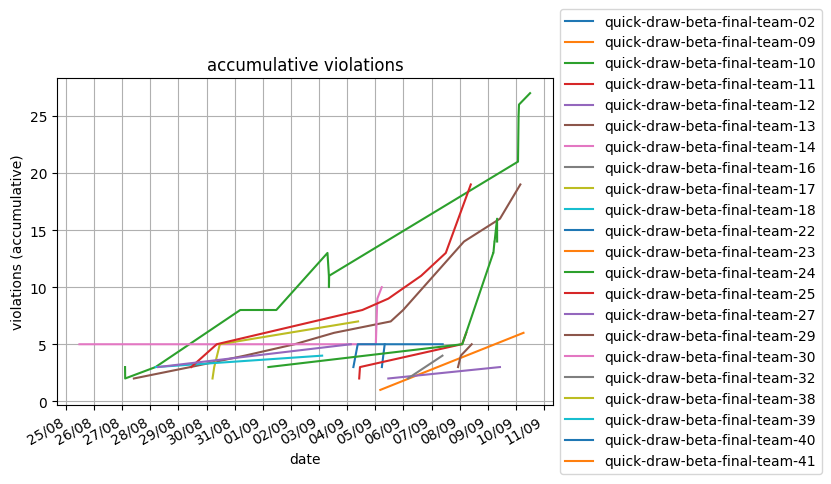

In [41]:
plt.title('accumulative violations')
plt.xlabel('date')
plt.ylabel('violations (accumulative)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.grid(True)

# accumulative violations (all violations per workflow run)
def accumulative(data):
    ds = defaultdict(list) # date
    vs = defaultdict(list) # violations
    
    for x in data:
        date = dateutil.parser.isoparse(x["date"])
        ds[x["name"]].append(date)
        vs[x["name"]].append(len(x["violations"]))
          

    for k in ds.keys():        
        plt.plot(ds[k], vs[k], label = k)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    

    
accumulative(data)

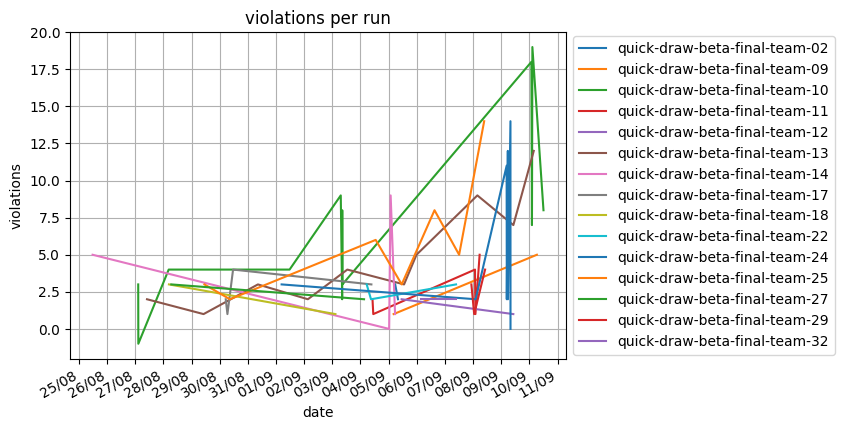

In [42]:
plt.title('violations per run')
plt.xlabel('date')
plt.ylabel('violations')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.grid(True)

# logs are "accumulative" violations (ie: all violations that exist within the project.
# instead plot as "new" violations per GHA run
def violationsPerRun(data):
    ds = defaultdict(list) # date
    vs = defaultdict(list) # violations

    for x in data:
        date = dateutil.parser.isoparse(x["date"])
        ds[x["name"]].append(date)
        vs[x["name"]].append(len(x["violations"]))
          

    for k in ds.keys():
        violations = vs[k]
        if len(violations) == 1:
            continue
        for i in range(1, len(violations)):
            violations[i] -= violations[i-1]
        vs[k] = violations
        plt.plot(ds[k], vs[k], label = k)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    
violationsPerRun(data)

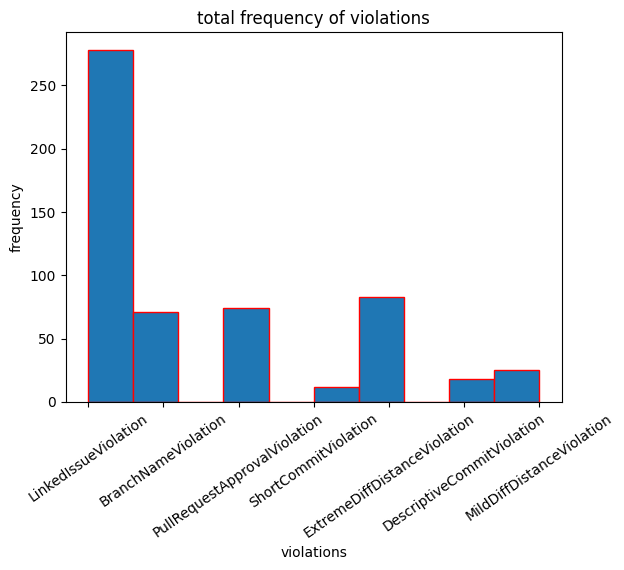

In [65]:
plt.figure().clear()
plt.title('total frequency of violations')
plt.xlabel('violations')
plt.ylabel('frequency')
plt.xticks(rotation=35)
def hist(data):
    violations = []
    for x in data:
        for v in x["violations"]:
            violations.append(v["Name"])
        #plt.plot(ds[k], vs[k], label = k)   
    plt.hist(violations, ec="red")

hist(data)